In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ClothingData = pd.read_csv(r"C:\Users\Adam\Documents\Python Scripts\ClothesDataset\images.csv") #dataset csv path

ClothingData = ClothingData.drop('sender_id', axis=1)
ClothingData = ClothingData.drop('kids', axis=1)

ClothingData
ClothingData['label'].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

In [10]:
list = ['Top','Hoodie','Blazer','Skirt']
ClothingData_new = ClothingData.loc[ClothingData['label'].isin(list)]
ClothingData_new

,image,label
10,70045b01-b350-4918-be74-2f627290ad7a,Skirt
16,04b42565-23ce-47d9-8f11-e3f1fb0d5051,Top
19,d44cfac9-3fda-47ba-8eb1-8b130f60b08c,Skirt
21,6ba8aeb1-a812-4bd7-a0b3-d898aebe3400,Top
34,f8b84112-9110-4628-91e8-9d22a13767f3,Skirt
...,...,...
5358,fcbdb909-01ec-4096-b4ad-41cba133b544,Hoodie
5375,4cd9a0b0-4953-47fb-b8d0-4eb9b3616b29,Blazer
5379,7fe3f9b7-ccee-4d88-a165-389762f3d77a,Blazer
5393,f4b934fc-e326-4f72-b535-53288b8b82d3,Skirt


In [11]:
ClothingData_new['index_label'] = pd.factorize(ClothingData_new.label)[0]
ClothingData_new

C:\Users\Adam\AppData\Local\Temp\ipykernel_4888\3020503257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClothingData_new['index_label'] = pd.factorize(ClothingData_new.label)[0]


,image,label,index_label
10,70045b01-b350-4918-be74-2f627290ad7a,Skirt,0
16,04b42565-23ce-47d9-8f11-e3f1fb0d5051,Top,1
19,d44cfac9-3fda-47ba-8eb1-8b130f60b08c,Skirt,0
21,6ba8aeb1-a812-4bd7-a0b3-d898aebe3400,Top,1
34,f8b84112-9110-4628-91e8-9d22a13767f3,Skirt,0
...,...,...,...
5358,fcbdb909-01ec-4096-b4ad-41cba133b544,Hoodie,2
5375,4cd9a0b0-4953-47fb-b8d0-4eb9b3616b29,Blazer,3
5379,7fe3f9b7-ccee-4d88-a165-389762f3d77a,Blazer,3
5393,f4b934fc-e326-4f72-b535-53288b8b82d3,Skirt,0


In [12]:
ClothingData_new['label'].value_counts()

Skirt     155
Blazer    109
Hoodie    100
Top        43
Name: label, dtype: int64

In [13]:
ClothingData_new.shape[0]

407

In [14]:
ClothingData_new

,image,label,index_label
10,70045b01-b350-4918-be74-2f627290ad7a,Skirt,0
16,04b42565-23ce-47d9-8f11-e3f1fb0d5051,Top,1
19,d44cfac9-3fda-47ba-8eb1-8b130f60b08c,Skirt,0
21,6ba8aeb1-a812-4bd7-a0b3-d898aebe3400,Top,1
34,f8b84112-9110-4628-91e8-9d22a13767f3,Skirt,0
...,...,...,...
5358,fcbdb909-01ec-4096-b4ad-41cba133b544,Hoodie,2
5375,4cd9a0b0-4953-47fb-b8d0-4eb9b3616b29,Blazer,3
5379,7fe3f9b7-ccee-4d88-a165-389762f3d77a,Blazer,3
5393,f4b934fc-e326-4f72-b535-53288b8b82d3,Skirt,0


In [15]:
from pathlib import Path
from PIL import Image
import os

path="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\images_compressed\\" #path to where original images are stored
path2="C:\\Users\\Adam\\Documents\\Python Scripts\\ClothesDataset\\ClassifiedName\\" #path where images after processed are stored


item_folder = Path(path)
item_folder.mkdir(parents=True, exist_ok=True)

for item_name in ClothingData_new.image:
    
    try:
        #get image and save as grayscale
        img=Image.open(os.path.join(path,item_name)+".jpg")
            
    except:
        print("unreadable file: "+item_name)
        
    img.save(f'{item_folder}/{item_name}'+".jpg")
        

In [16]:
from pathlib import Path
from PIL import Image
import os


# iterate over the unique label 
for item_name in ClothingData_new.label.unique(): 
    
    # create folder according to the label name 
    #item_folder = Path(f"{item_name}/")
    item_folder = Path(path2+f"{item_name}/")
    item_folder.mkdir(parents=True, exist_ok=True)
    
    # store id and gt for unique labels
    id = []
    gt = []
    
    # iterate over all possible number of unique labels 
    for id_label in ClothingData_new.loc[ClothingData_new['label'] == item_name].values.tolist():
        # id_label :['image_id', 'label']
        id.append(id_label[0]) # image_id
        gt.append(id_label[1]) # label
        
       # img = Image.open() # read the image 
#img = Image.open(id_label[0]) # read the image 
           
        try:
            #get image and save as grayscale
            img=Image.open(os.path.join(path,id_label[0])+".jpg").convert('L')
            
         
        except:
            print("unreadable file: "+id_label[0])
            
        # Resize Image
        basewidth = 300
        wpercent = (basewidth / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        img = img.resize((basewidth, hsize), Image.ANTIALIAS)
            
            
        img.save(f'{item_folder}/{id_label[0]}'+".jpg") # and save to target folder 
    
    # save the individual ground truth 
    # to the concern directory 
    label = pd.DataFrame({ 
            'Image Index': id,
            'labels': gt
        })
#label.to_csv(f'{path2}/{item_folder}.csv', index=False)

    label.to_csv(f'{item_folder}.csv', index=False)

C:\Users\Adam\AppData\Local\Temp\ipykernel_4888\363028418.py:39: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


Skirt Image Before Prelimenary Pre-Processing


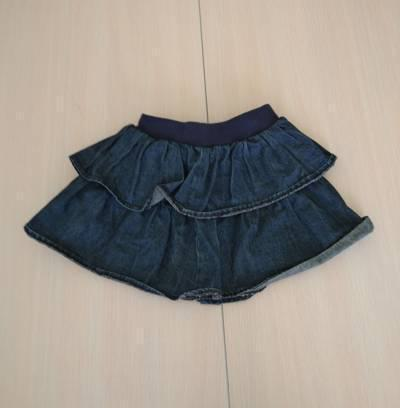

In [17]:
from IPython.display import Image

print("Skirt Image Before Prelimenary Pre-Processing")
Image(filename=path+'32b99302-cec7-4dec-adfa-3d4029674209.jpg') 

Skirt Image After Prelimenary Pre-Processing


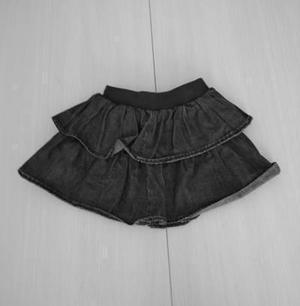

In [18]:
print("Skirt Image After Prelimenary Pre-Processing")
Image(filename=path2+'Skirt\\32b99302-cec7-4dec-adfa-3d4029674209.jpg') 

Top Image Before Prelimenary Pre-Processing


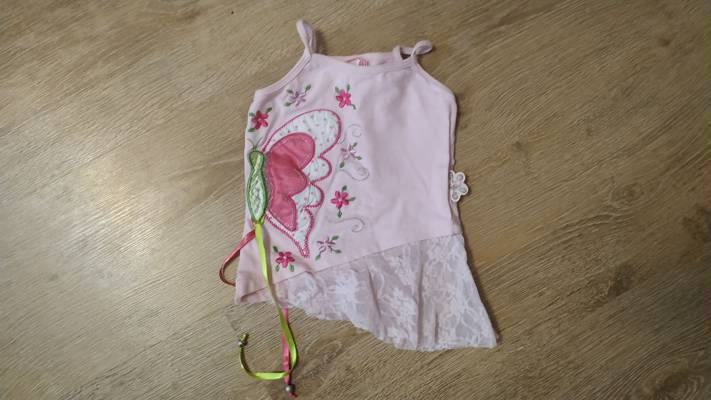

In [19]:
print("Top Image Before Prelimenary Pre-Processing")
Image(filename=path+'639e07c5-afc2-4ea0-ab13-5a77a25bf88f.jpg') 

Top Image After Prelimenary Pre-Processing


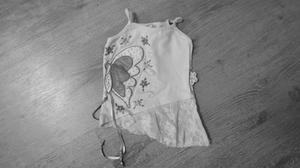

In [20]:
print("Top Image After Prelimenary Pre-Processing")
Image(filename=path2+'Top\\639e07c5-afc2-4ea0-ab13-5a77a25bf88f.jpg') 

Hoodie Image Before Prelimenary Pre-Processing


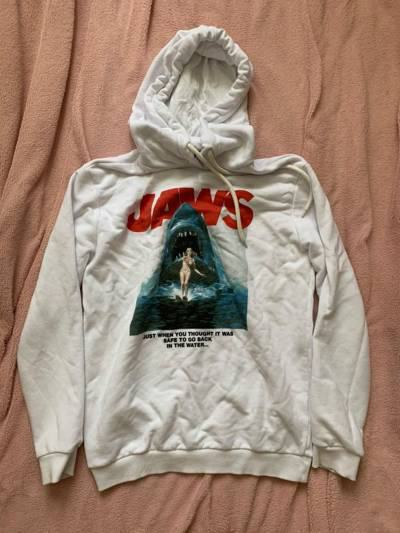

In [21]:
print("Hoodie Image Before Prelimenary Pre-Processing")
Image(filename=path+'06bb461c-a133-46be-9663-a56a14cf6712.jpg') 

Hoodie Image After Prelimenary Pre-Processing


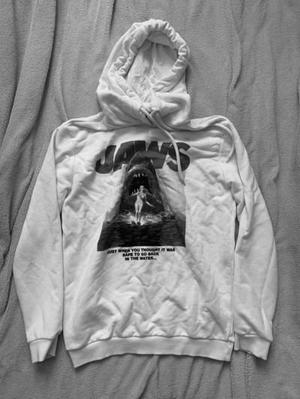

In [22]:
print("Hoodie Image After Prelimenary Pre-Processing")
Image(filename=path2+'Hoodie\\06bb461c-a133-46be-9663-a56a14cf6712.jpg') 

Blazer Image Before Prelimenary Pre-Processing


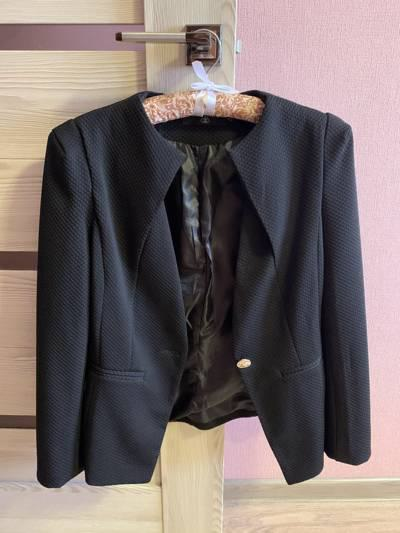

In [23]:
print("Blazer Image Before Prelimenary Pre-Processing")
Image(filename=path+'d9345829-4806-4cb5-ab25-85fb4e25595d.jpg') 

Blazer Image After Prelimenary Pre-Processing


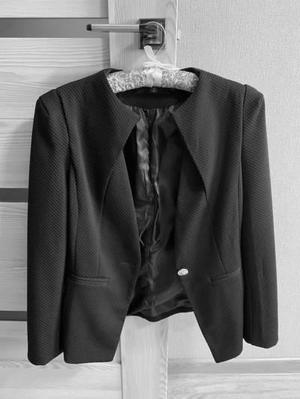

In [24]:
print("Blazer Image After Prelimenary Pre-Processing")
Image(filename=path2+'Blazer\\d9345829-4806-4cb5-ab25-85fb4e25595d.jpg')

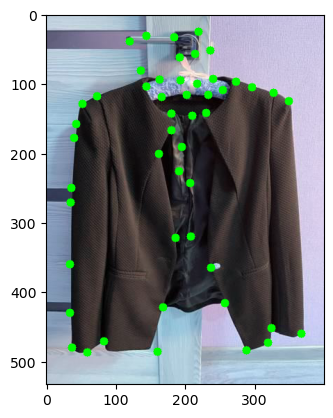

-1

In [25]:
# Importing the libraries
import cv2
import numpy as np
  
# Reading the image and converting into B?W
image = cv2.imread(path+'d9345829-4806-4cb5-ab25-85fb4e25595d.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=50, qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 6, (0, 255, 0), -1)
  
# Showing the image

plt.imshow(image)
plt.show()
#cv2.imshow('good_features', image)
cv2.waitKey()

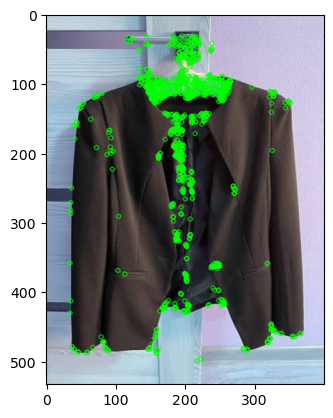

-1

In [26]:
# Reading the image and converting into B/W
image = cv2.imread(path+'d9345829-4806-4cb5-ab25-85fb4e25595d.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_image, None)
  
# Drawing the keypoints
kp_image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)
  
plt.imshow(kp_image)
plt.show()
#cv2.imshow('ORB', kp_image)
cv2.waitKey()

In [27]:
import random
import os
import scipy.misc
import scipy.ndimage
import skimage.filters
import imageio

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model


In [28]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

C:\Users\Adam\AppData\Local\Temp\ipykernel_4888\3128856950.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grayscale = imageio.imread(path2+'Blazer//d9345829-4806-4cb5-ab25-85fb4e25595d.jpg')


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


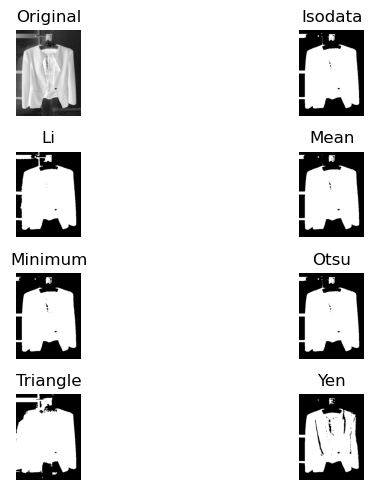

In [29]:
import imageio

#median_filtered = scipy.ndimage.median_filter(, size=3)
grayscale = imageio.imread(path2+'Blazer//d9345829-4806-4cb5-ab25-85fb4e25595d.jpg')
grayscale = 255 - grayscale
median_filtered = scipy.ndimage.median_filter(grayscale, size=3)
result = skimage.filters.thresholding.try_all_threshold(median_filtered)

In [30]:
from pylab import *
from sklearn.decomposition import PCA
import pickle

KeyboardInterrupt: 

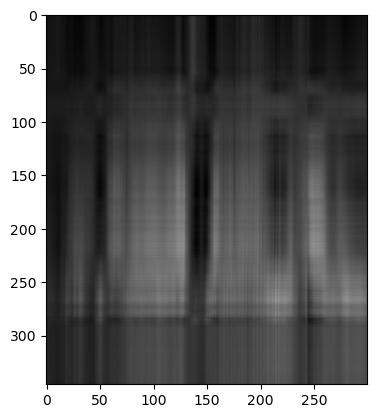

In [31]:
#Best 2 Features for Blazer
#Create Folder
item_folder = Path(path2+"Best2FeatureBlazer")
item_folder.mkdir(parents=True, exist_ok=True)

item_folder1 = Path(path2+"Best2Feature")
item_folder1.mkdir(parents=True, exist_ok=True)


# iterate over the unique label 
for images in os.listdir(path2+"\\Blazer"):
    
    img = cv2.imread(path2+"\\Blazer\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(2)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best2FeatureBlazer\\"+images, bbox_inches='tight')
    plt.savefig(path2+"\\Best2Feature\\"+images, bbox_inches='tight')


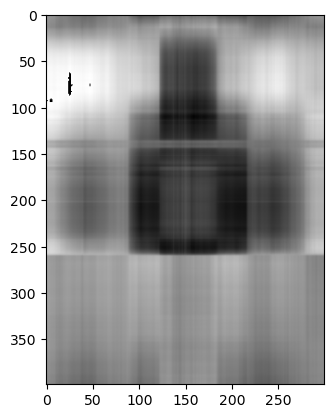

In [ ]:
#Best 2 Features for Hoodie
#Create Folder
item_folder = Path(path2+"Best2FeatureHoodie")
item_folder.mkdir(parents=True, exist_ok=True)


for images in os.listdir(path2+"\\Hoodie"):
    
    img = cv2.imread(path2+"\\Hoodie\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(2)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best2FeatureHoodie\\"+images, bbox_inches='tight')
    plt.savefig(path2+"\\Best2Feature\\"+images, bbox_inches='tight')

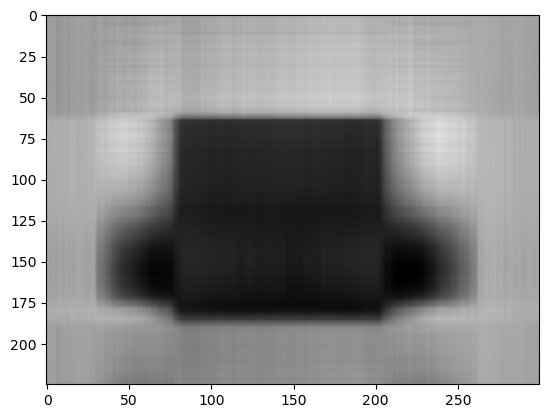

In [ ]:
#Best 2 Features for Skirt
#Create Folder
item_folder = Path(path2+"Best2FeatureSkirt")
item_folder.mkdir(parents=True, exist_ok=True)


for images in os.listdir(path2+"\\Skirt"):
    
    img = cv2.imread(path2+"\\Skirt\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(2)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best2FeatureSkirt\\"+images, bbox_inches='tight')
    plt.savefig(path2+"\\Best2Feature\\"+images, bbox_inches='tight')

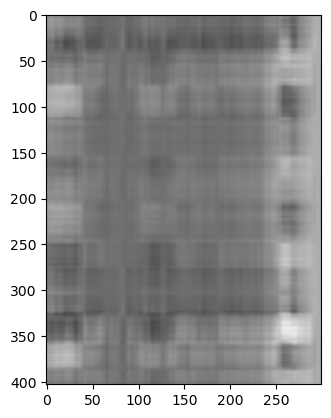

In [ ]:
#Best 2 Features for Top
#Create Folder
item_folder = Path(path2+"Best2FeatureTop")
item_folder.mkdir(parents=True, exist_ok=True)


for images in os.listdir(path2+"\\Top"):
    
    img = cv2.imread(path2+"\\Top\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(2)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best2FeatureTop\\"+images, bbox_inches='tight')
    plt.savefig(path2+"\\Best2Feature\\"+images, bbox_inches='tight')

KeyboardInterrupt: 

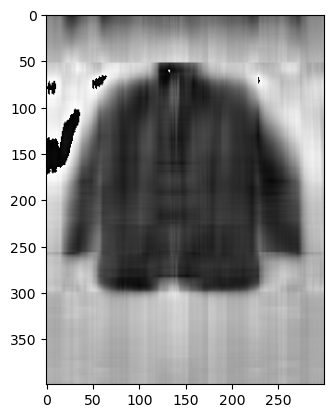

In [ ]:
#Best 5 Features for Blazer
#Create Folder
item_folder = Path(path2+"Best5FeatureBlazer")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Blazer"):
    
    img = cv2.imread(path2+"\\Blazer\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(5)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best5FeatureBlazer\\"+images, bbox_inches='tight')

KeyboardInterrupt: 

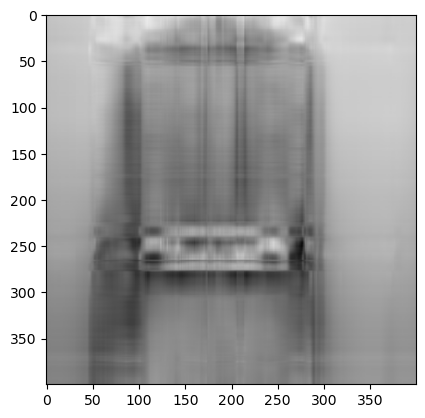

In [ ]:
#Best 5 features for all items
#Create Folder

item_folder = Path(path2+"Best5Feature")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path):
    
    img = cv2.imread(path+"\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(5)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best5Feature\\"+images, bbox_inches='tight')

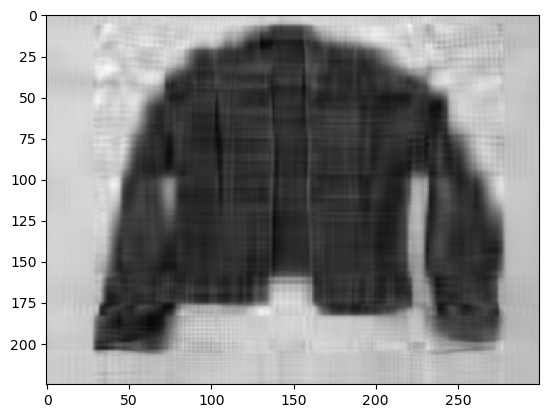

In [ ]:
#Best 10 Features for Blazer
#Create Folder
item_folder = Path(path2+"Best10FeatureBlazer")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path2+"\\Blazer"):
    
    img = cv2.imread(path2+"\\Blazer\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(10)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best10FeatureBlazer\\"+images, bbox_inches='tight')#Best 10 Features for Blazer


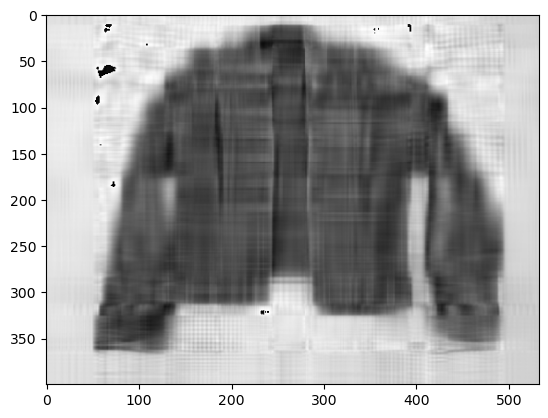

In [ ]:
#Best 10 features for all items
#Create Folder

item_folder = Path(path2+"Best10Feature")
item_folder.mkdir(parents=True, exist_ok=True)

# iterate over the unique label 
for images in os.listdir(path):
    
    img = cv2.imread(path+"\\"+images)
    blue,green,red = cv2.split(img) 
    
    #initialize PCA with first 20 principal components
    pca = PCA(10)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

    #viewing the compressed image
    plt.imshow(img_compressed)
    
    plt.savefig(path2+"\\Best10Feature\\"+images, bbox_inches='tight')

In [ ]:
#Applying oneR classifier on the entire dataset

In [ ]:
images = []
labels = []
index_labels = []
size = (256,256)

for filename in os.listdir(path):
    
    # reading images from folder image_set1
    image =cv2.imread(f'{path}/{filename}')
    image_bw = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #print(image_bw.shape,type(image_bw))
    image_bw_rs = cv2.resize(image_bw,size)
    #print(image_bw_rs.shape,type(image_bw_rs))
    #storing images
    images.append(image_bw_rs)
   
    #storing labels
    image_name = filename.removesuffix(".jpg")
    clothing_label_instance = ClothingData_new.loc[ClothingData_new['image'] == image_name,'label'].item()
    labels.append(clothing_label_instance)
    clothing_ilabel_instance = ClothingData_new.loc[ClothingData_new['image'] == image_name,'index_label'].item()
    index_labels.append(clothing_ilabel_instance)
    
images_arr = np.stack(images)
images_arr = images_arr.reshape((images_arr.shape[0],-1))
df = pd.DataFrame(data = images_arr, columns = ['pixels_'+str(i+1) for i in range(images_arr.shape[1])])

In [ ]:
df[:15]

,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,pixels_10,...,pixels_65527,pixels_65528,pixels_65529,pixels_65530,pixels_65531,pixels_65532,pixels_65533,pixels_65534,pixels_65535,pixels_65536
0,169,163,162,167,145,172,151,158,152,146,...,100,106,99,125,131,98,75,86,122,100
1,235,236,236,235,235,233,230,229,226,220,...,176,174,173,172,170,167,168,166,164,162
2,156,157,158,159,160,160,160,161,162,162,...,187,187,187,187,187,187,187,187,187,187
3,238,239,240,239,238,237,237,237,237,237,...,171,171,171,171,171,169,169,168,167,167
4,103,113,114,110,110,112,113,110,101,93,...,117,116,118,112,122,113,120,127,111,118
5,141,144,149,152,153,154,155,157,160,161,...,169,169,169,168,167,167,167,167,167,167
6,74,77,79,80,79,82,79,79,82,79,...,115,114,122,130,130,133,132,137,130,126
7,89,90,90,90,89,90,91,91,92,92,...,158,158,158,157,155,153,153,153,153,153
8,109,109,109,109,109,108,108,107,107,106,...,162,161,160,159,158,157,154,151,149,147
9,92,92,93,93,94,93,93,94,94,95,...,163,163,163,163,163,163,163,162,161,161


In [ ]:
import numpy as np
index_labels_arr = np.array(index_labels)

In [ ]:
index_labels_arr

array([2, 2, 3, 0, 0, 3, 0, 0, 3, 1, 2, 0, 0, 3, 2, 0, 0, 3, 2, 0, 2, 3,
       3, 0, 0, 3, 0, 2, 0, 0, 3, 0, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 2, 0,
       3, 3, 1, 2, 1, 3, 0, 1, 3, 2, 3, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 1,
       2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 2, 3, 2, 0, 3, 0, 0, 2, 3, 0, 0, 0,
       0, 2, 3, 3, 3, 0, 0, 0, 2, 2, 0, 0, 3, 2, 3, 2, 2, 0, 3, 2, 0, 1,
       3, 3, 2, 1, 2, 0, 0, 0, 3, 2, 3, 3, 1, 3, 0, 0, 0, 0, 0, 2, 0, 3,
       1, 0, 0, 1, 2, 3, 0, 0, 2, 0, 3, 2, 0, 1, 0, 0, 2, 0, 2, 0, 3, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 2, 3, 0, 3, 0, 0, 2, 3, 3, 2, 0,
       3, 2, 3, 1, 3, 1, 0, 3, 3, 0, 0, 3, 3, 2, 2, 1, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 2, 3, 0, 3, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 3, 1, 3, 2, 2,
       0, 0, 3, 0, 2, 3, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 3, 2, 2, 0, 2,
       3, 1, 0, 3, 0, 2, 2, 0, 2, 3, 2, 0, 0, 0, 0, 3, 3, 2, 3, 2, 0, 1,
       2, 1, 2, 3, 0, 0, 2, 0, 0, 2, 3, 3, 3, 2, 3,

In [ ]:
#splitting the testing and training data

from sklearn.model_selection import train_test_split
images_train, images_test, labels_train, labels_test = train_test_split(images_arr, index_labels_arr, random_state=0, stratify=index_labels_arr)

In [ ]:
#applying the OneR classifier

from mlxtend.classifier import OneRClassifier
oner = OneRClassifier()
oner.fit(images_train, labels_train);

In [ ]:
#getting the index of the attribute of the image dataset that gives the best accuracy
oner.feature_idx_

19233

In [ ]:
#getting the predicted values after model fitting
oner.predict(images_train)

array([0, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 1, 0, 3, 0, 2, 2, 0,
       3, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 3, 2, 0, 3, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 0, 2, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 3, 3, 2, 2, 0,
       0, 3, 0, 0, 0, 3, 2, 2, 2, 0, 0, 0, 3, 2, 0, 0, 3, 0, 1, 2, 1, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 2, 0, 0, 2, 1,
       2, 3, 2, 3, 0, 0, 0, 0, 2, 0, 0, 2, 3, 0, 2, 0, 1, 3, 1, 1, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3,
       1, 2, 0, 3, 3, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 3, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0, 1,
       3, 2, 2, 0, 3, 3, 0, 0, 2, 2, 2, 0, 2, 2, 0, 3, 2, 2, 1, 3, 0, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 3, 0, 2, 0, 3, 0, 0, 1, 3, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 3, 2, 3, 2, 3, 3, 0, 3, 0, 1, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 0, 1, 1, 2, 2, 0, 3, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 3, 0, 3,
       0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 0, 1, 3, 0, 2,

In [ ]:
#getting the accuracy based on the training set
labels_pred = oner.predict(images_train)
train_acc = np.mean(labels_pred == labels_train)  
print(f'Training accuracy {train_acc*100:.2f}%')

Training accuracy 78.03%


In [ ]:
#getting the accuracy based on the testing set
test_acc = oner.score(images_test, labels_test)
print(f'Test accuracy {test_acc*100:.2f}%')

Test accuracy 28.43%


In [ ]:
#Applying Keras Classifier

In [ ]:

train_data_dir = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16